<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw-05/blob/main/hw_05_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

# Завантаження датасету з Kaggle
path = kagglehub.dataset_download("sootersaalu/amazon-top-50-bestselling-books-2009-2019")
df = pd.read_csv(f"{path}/bestsellers with categories.csv")

# Оновлення назв колонок
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


In [ ]:
# 1. Перевірка пропусків
print(df.isna().sum())


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


In [ ]:
# 2. Унікальні жанри
print(df['genre'].unique())


['Non Fiction' 'Fiction']


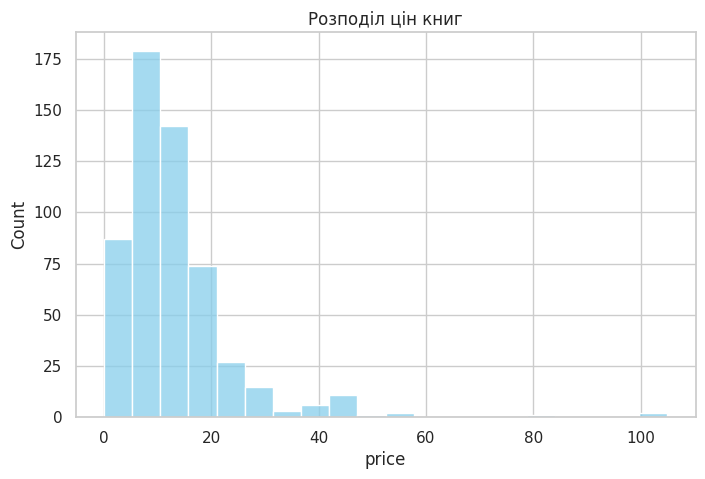

In [ ]:
# 3. Розподіл цін
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=20, color='skyblue')
plt.title("Розподіл цін книг")
plt.show()


In [ ]:
# Статистика по цінах
print("Максимальна ціна:", df['price'].max())
print("Мінімальна ціна:", df['price'].min())
print("Середня ціна:", df['price'].mean())
print("Медіанна ціна:", df['price'].median())


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


In [ ]:
# Пошук і сортування
max_rating = df['user_rating'].max()
print("Найвищий рейтинг:", max_rating)
print("Кількість книг з таким рейтингом:", (df['user_rating'] == max_rating).sum())

max_reviews_book = df.loc[df['reviews'].idxmax()]
print("Книга з найбільшою кількістю відгуків:", max_reviews_book['name'])


Найвищий рейтинг: 4.9
Кількість книг з таким рейтингом: 52
Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


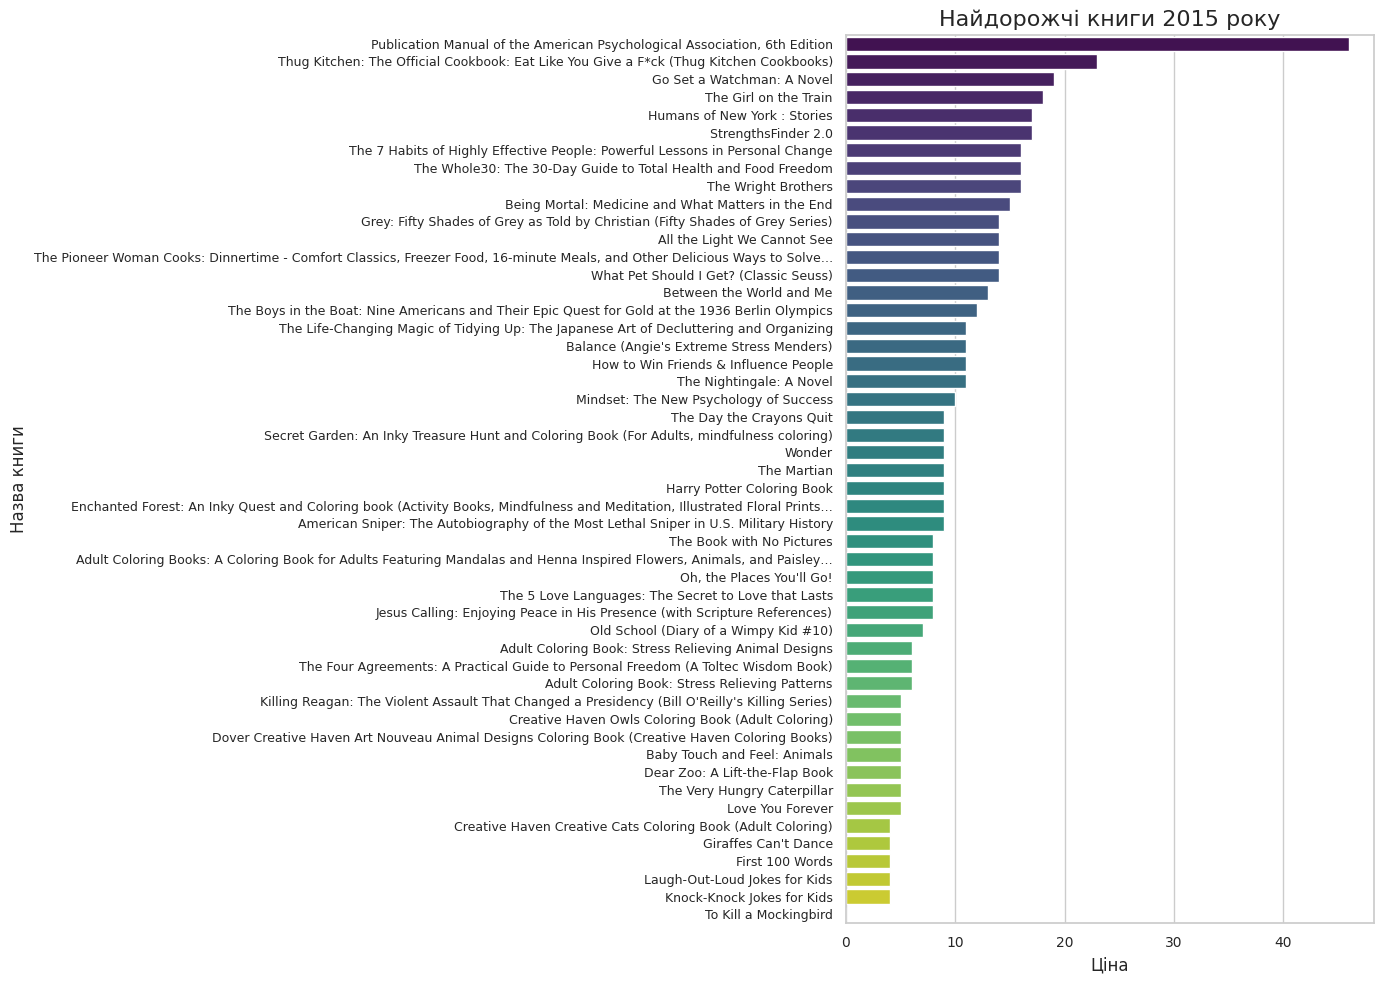

In [ ]:
# Найдорожчі книги 2015 року
plt.figure(figsize=(14, 10))
sns.barplot(
    data=books_2015.sort_values("price", ascending=False),
    x="price", y="name", hue="name", palette="viridis", legend=False
)
plt.title("Найдорожчі книги 2015 року", fontsize=16)
plt.xlabel("Ціна", fontsize=12)
plt.ylabel("Назва книги", fontsize=12)
plt.yticks(fontsize=9)  # зменшення шрифту для підписів
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
# Fiction 2010 року
fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
print("Кількість Fiction 2010:", fiction_2010.shape[0])


Кількість Fiction 2010: 20


In [ ]:
# Рейтинг 4.9 у 2010 та 2011
rating_49 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
print("Кількість книг з рейтингом 4.9 у 2010-2011:", rating_49.shape[0])


Кількість книг з рейтингом 4.9 у 2010-2011: 1


In [ ]:
# Сортування 2015 року < 8$
cheap_books_2015 = books_2015[books_2015['price'] < 8].sort_values("price")
print("Остання книга у списку дешевих 2015:", cheap_books_2015.iloc[-1]['name'])


Остання книга у списку дешевих 2015: Old School (Diary of a Wimpy Kid #10)


In [ ]:
# Агрегування
agg_prices = df.groupby('genre')['price'].agg(['max', 'min'])
print(agg_prices)


             max  min
genre                
Fiction       82    0
Non Fiction  105    0


In [ ]:
# Кількість книг на автора
author_books = df.groupby('author')['name'].count().reset_index(name='book_count')
print("Розмірність:", author_books.shape)
top_author = author_books.loc[author_books['book_count'].idxmax()]
print("Автор з найбільшою кількістю книг:", top_author['author'], "-", top_author['book_count'])


Розмірність: (248, 2)
Автор з найбільшою кількістю книг: Jeff Kinney - 12


In [ ]:
# Середній рейтинг на автора
author_rating = df.groupby('author')['user_rating'].mean().reset_index(name='avg_rating')
min_rating_author = author_rating.loc[author_rating['avg_rating'].idxmin()]
print("Мінімальний середній рейтинг у:", min_rating_author['author'], "-", min_rating_author['avg_rating'])


Мінімальний середній рейтинг у: Donna Tartt - 3.9


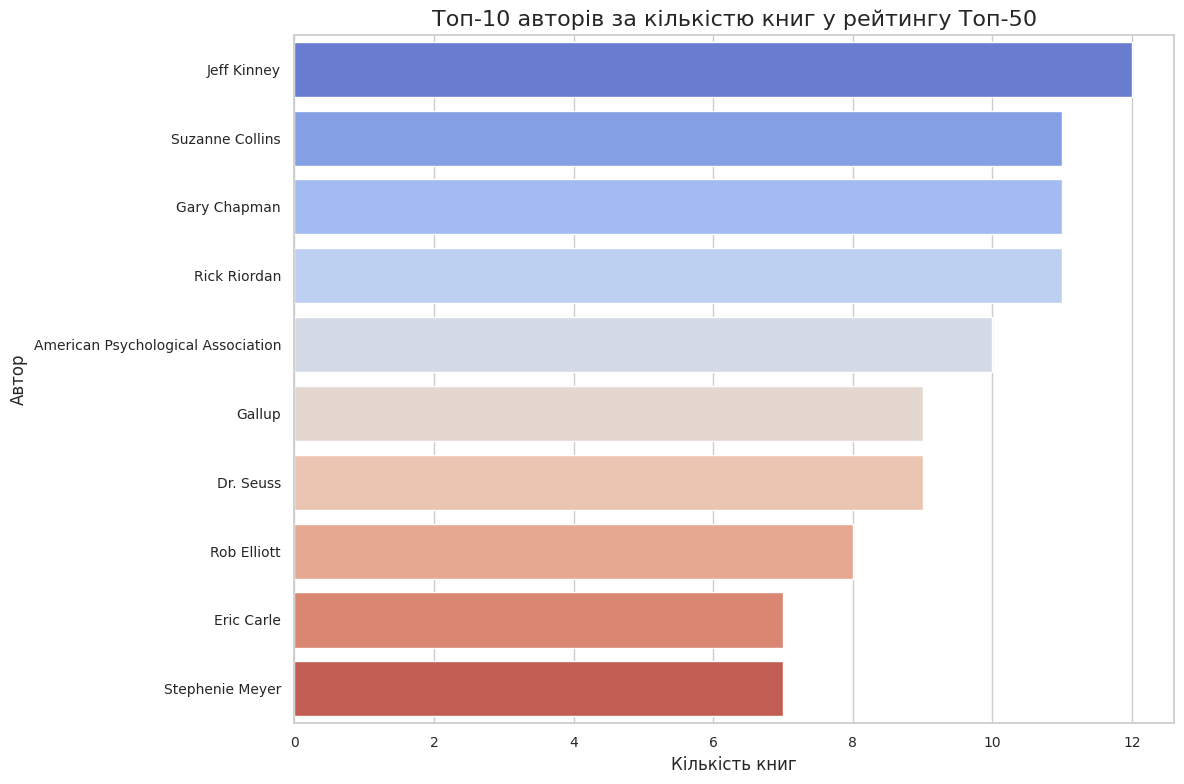

In [ ]:
# Топ-10 авторів за кількістю книг
top_authors = merged_df.sort_values("book_count", ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_authors.reset_index(),
    x="book_count",
    y="author",
    hue="author",
    dodge=False,
    palette="coolwarm",
    legend=False
)
plt.title("Топ-10 авторів за кількістю книг у рейтингу Топ-50", fontsize=16)
plt.xlabel("Кількість книг", fontsize=12)
plt.ylabel("Автор", fontsize=12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()
